### Ground clutter removal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path as PathlibPath

# Add the project root to the path
current_dir = PathlibPath.cwd()
project_root = current_dir.parent 

import os
os.chdir(project_root)

In [ ]:
original_file = "data/processed/ZH_radar_dataset_raw.npy"
cleaned_file = "data/processed/ZH_radar_dataset.npy"

original_data = np.load(original_file)
cleaned_data = np.load(cleaned_file)

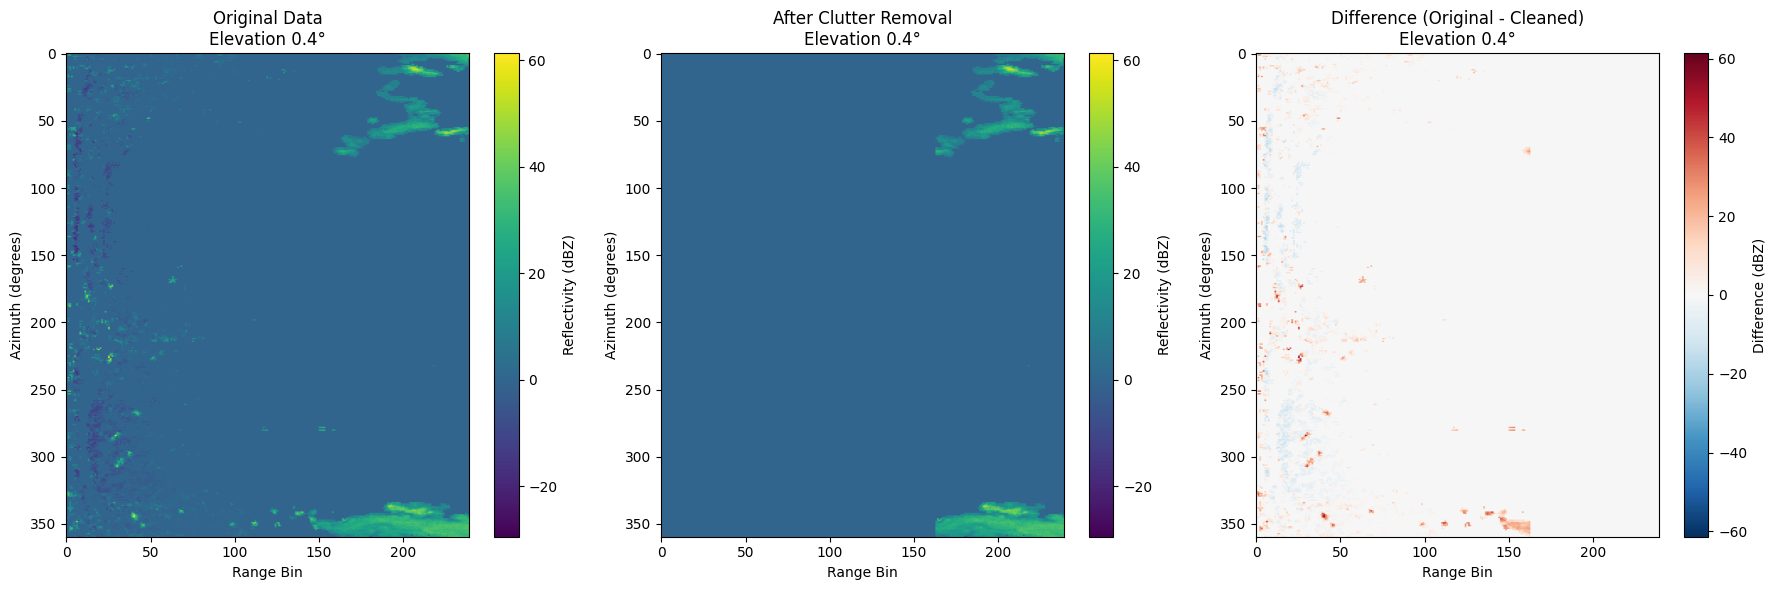

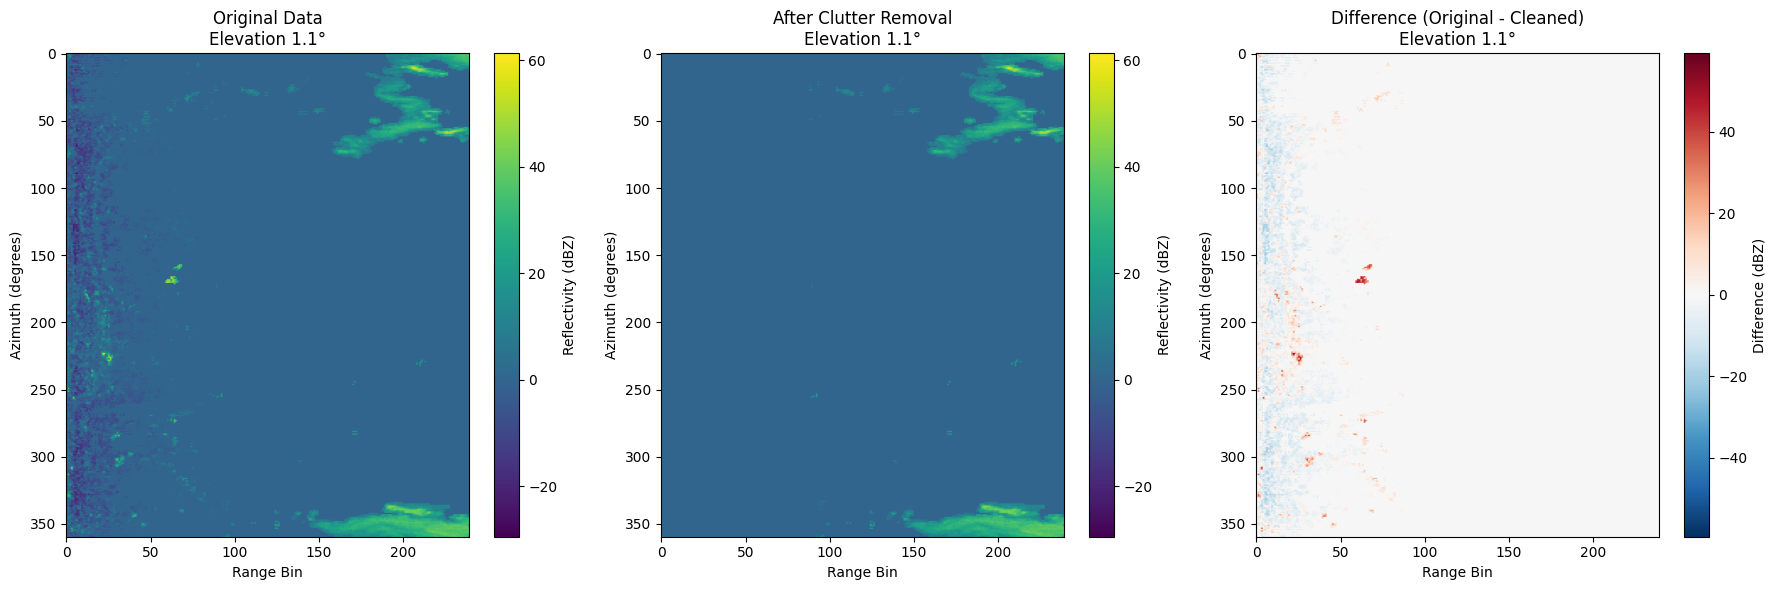

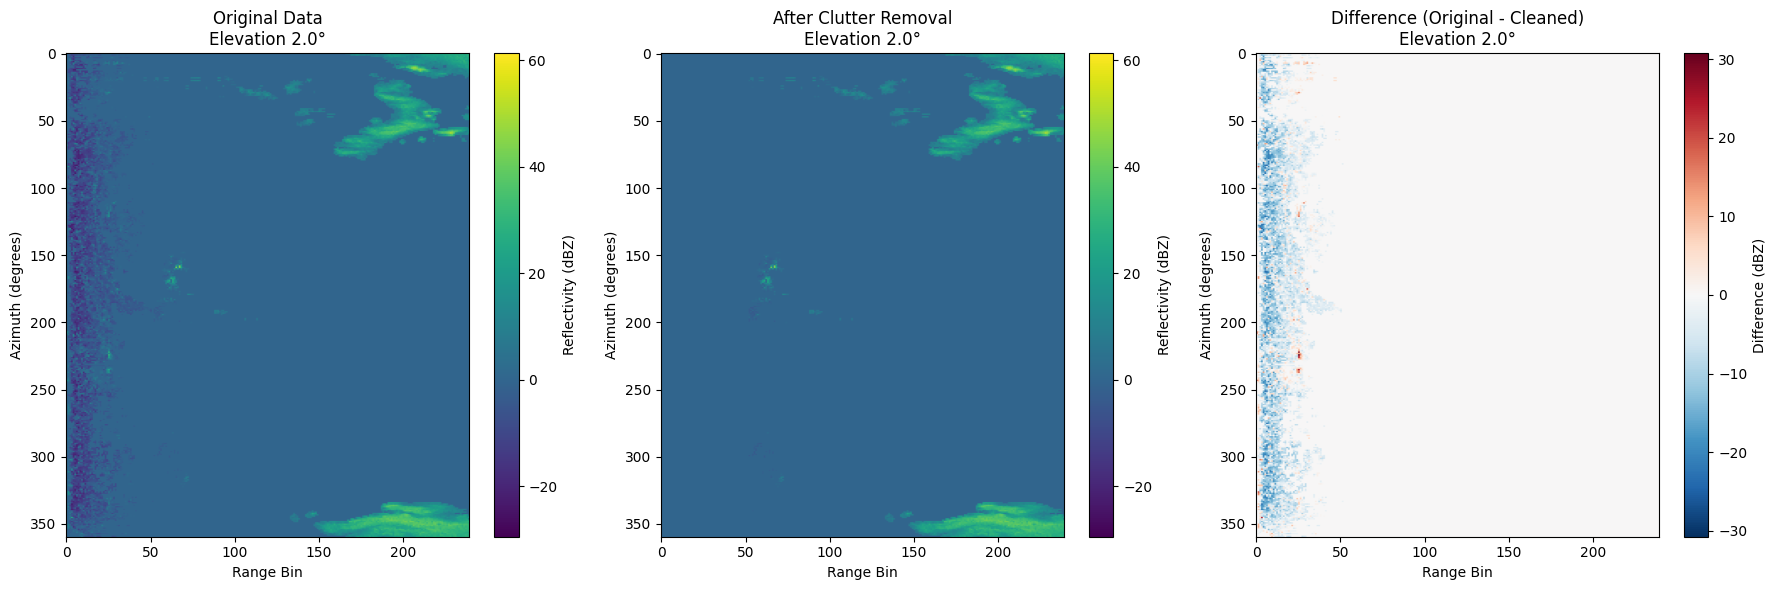

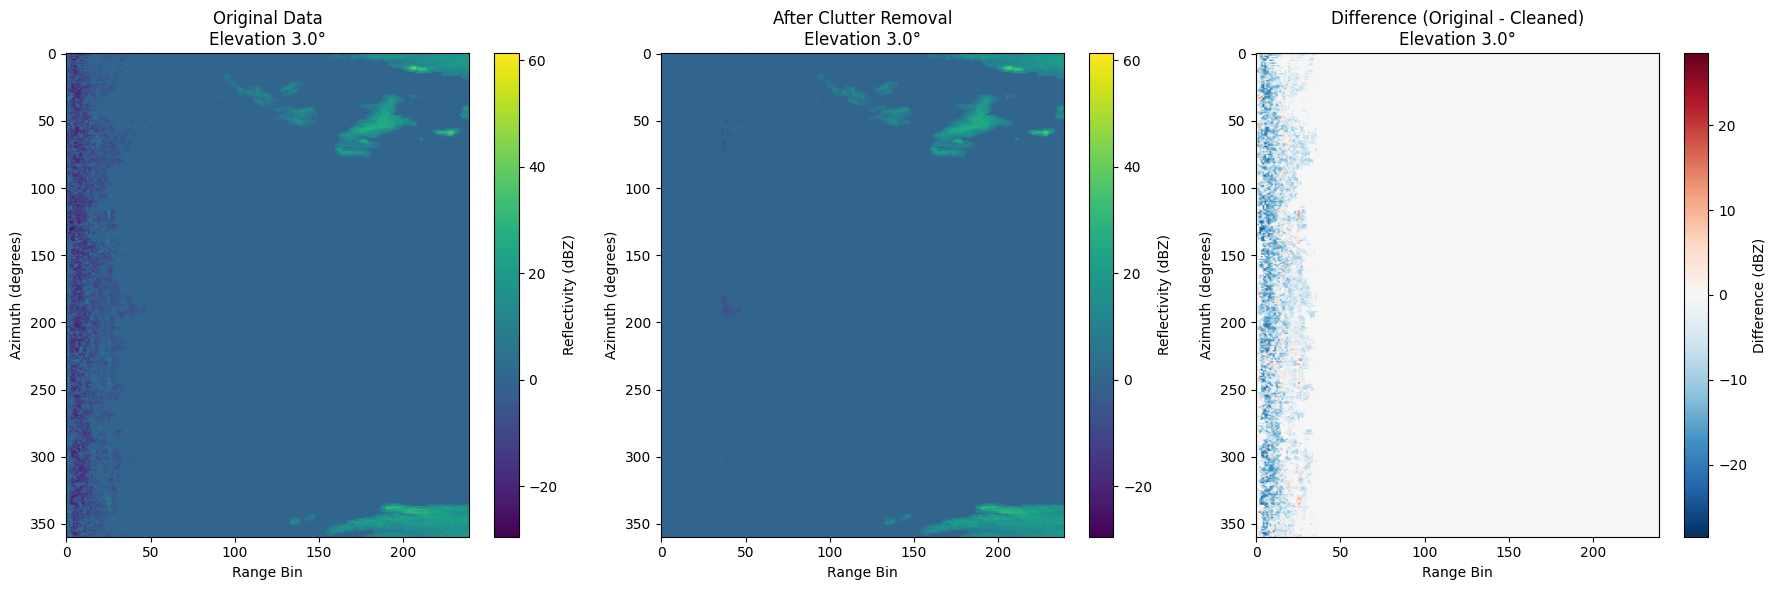

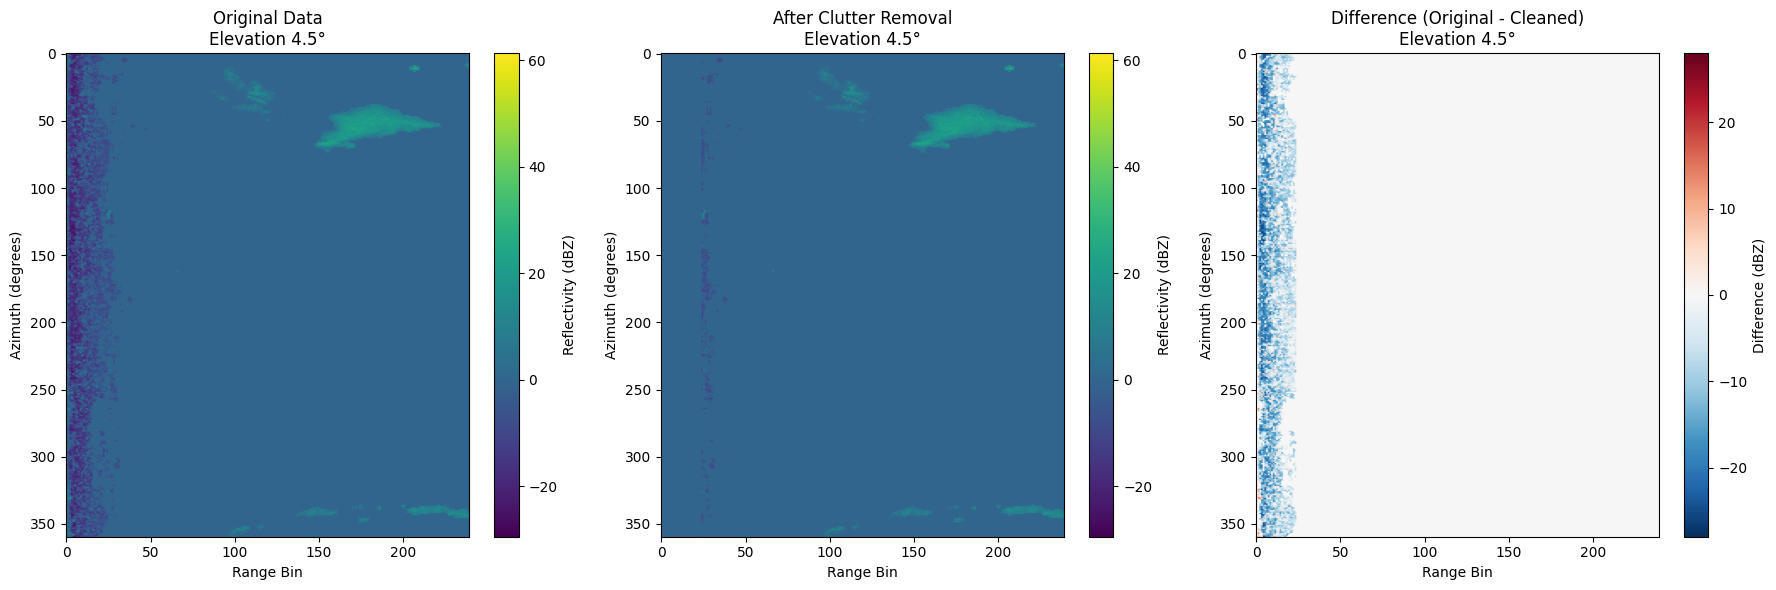

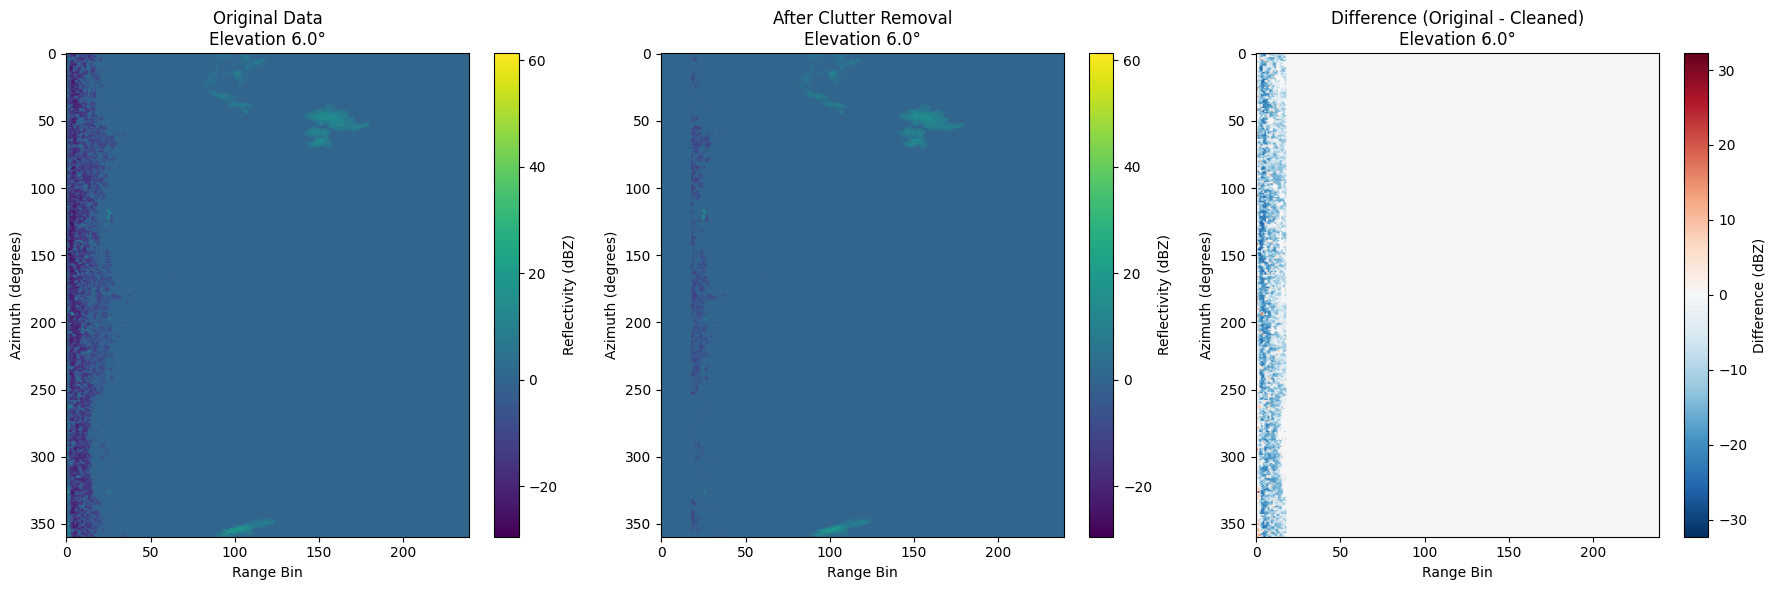

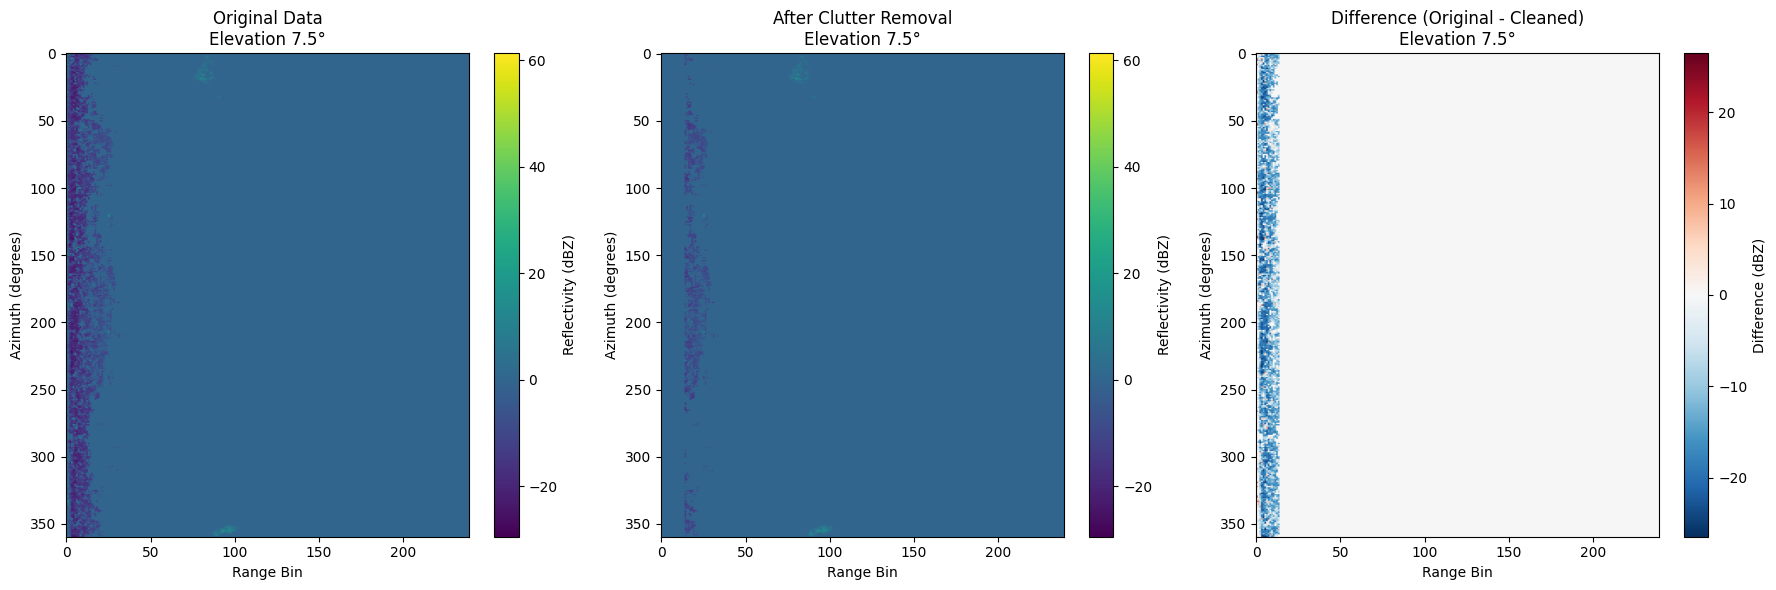

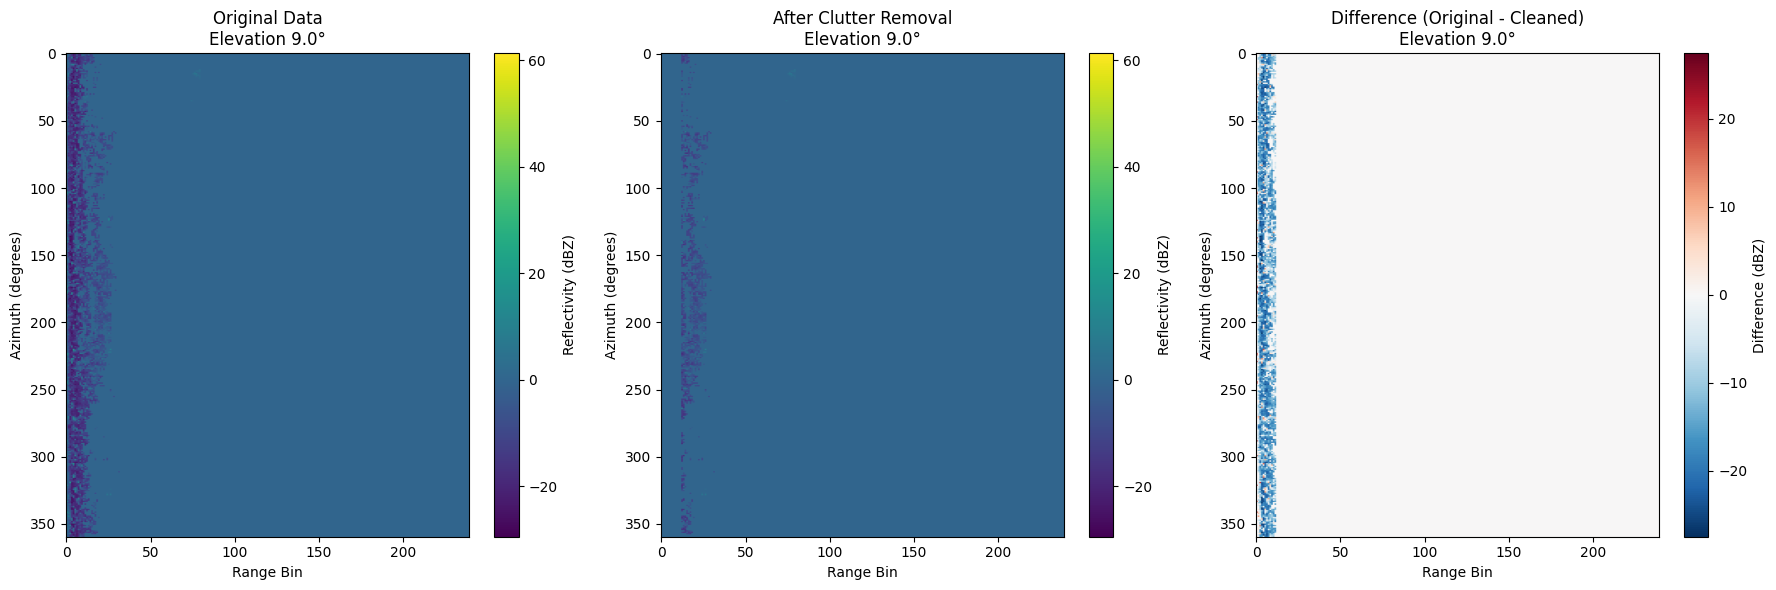

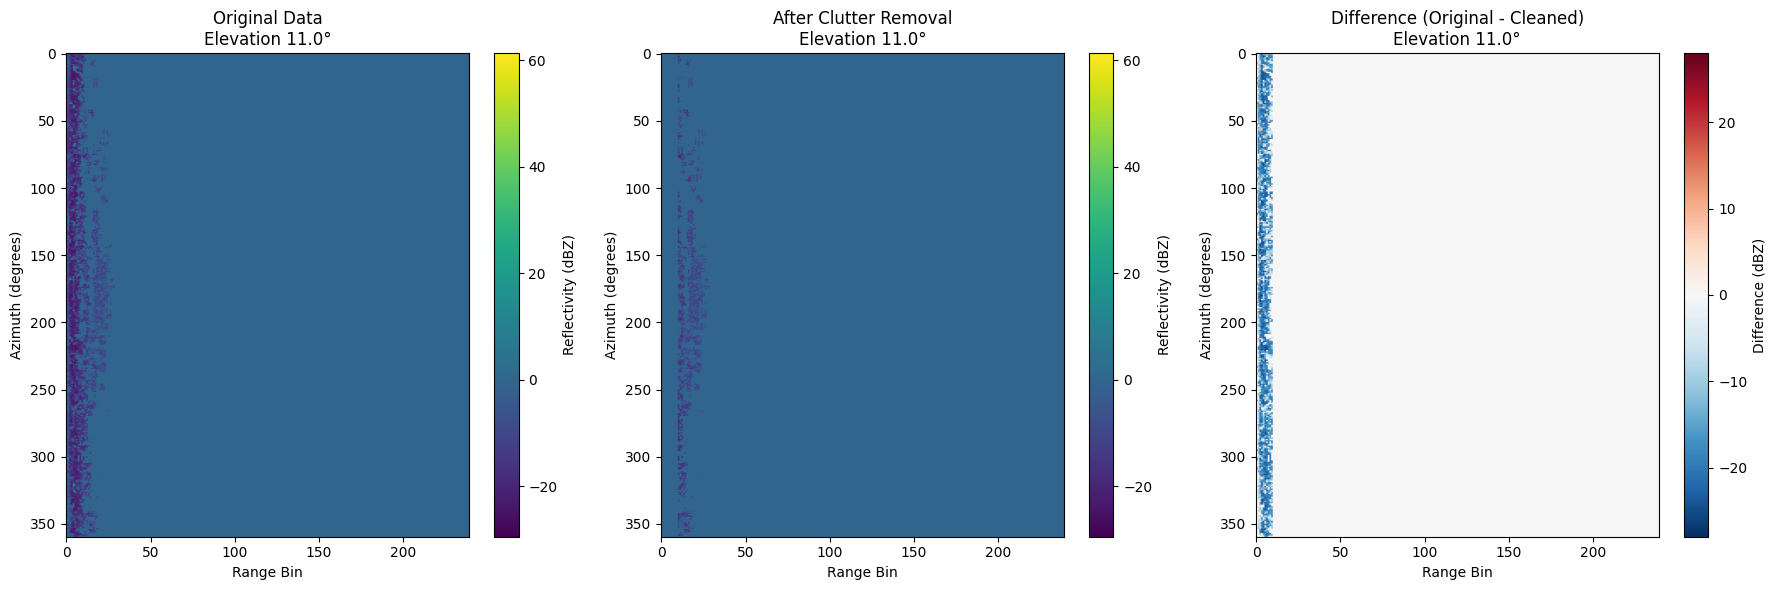

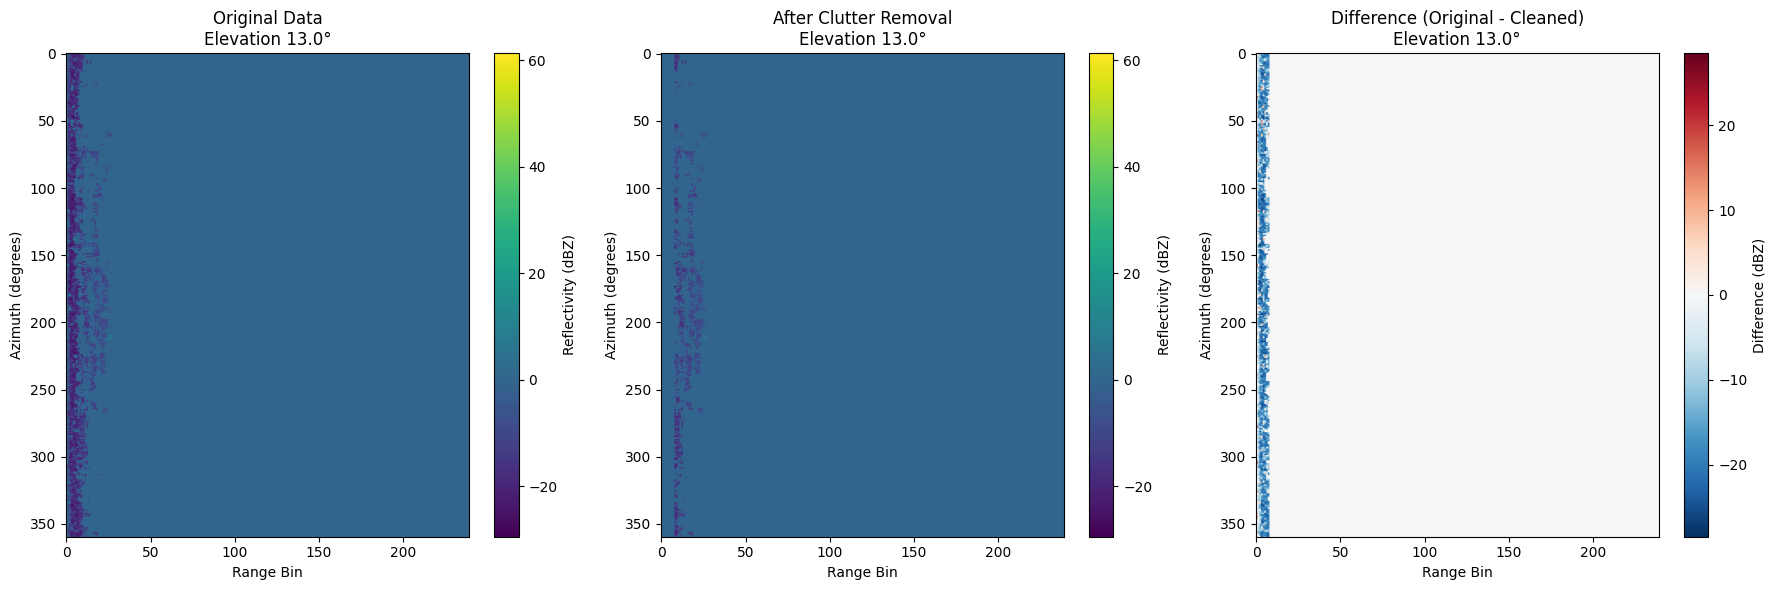

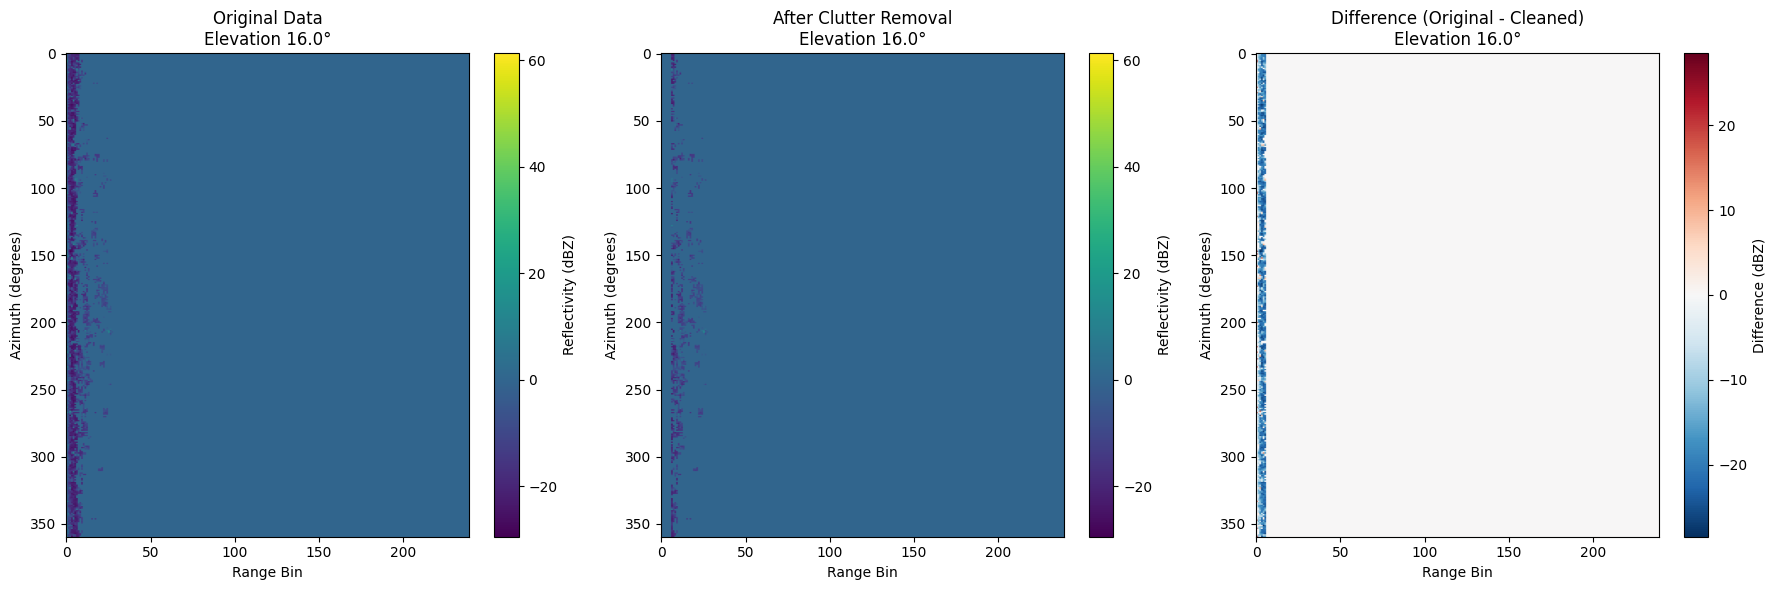

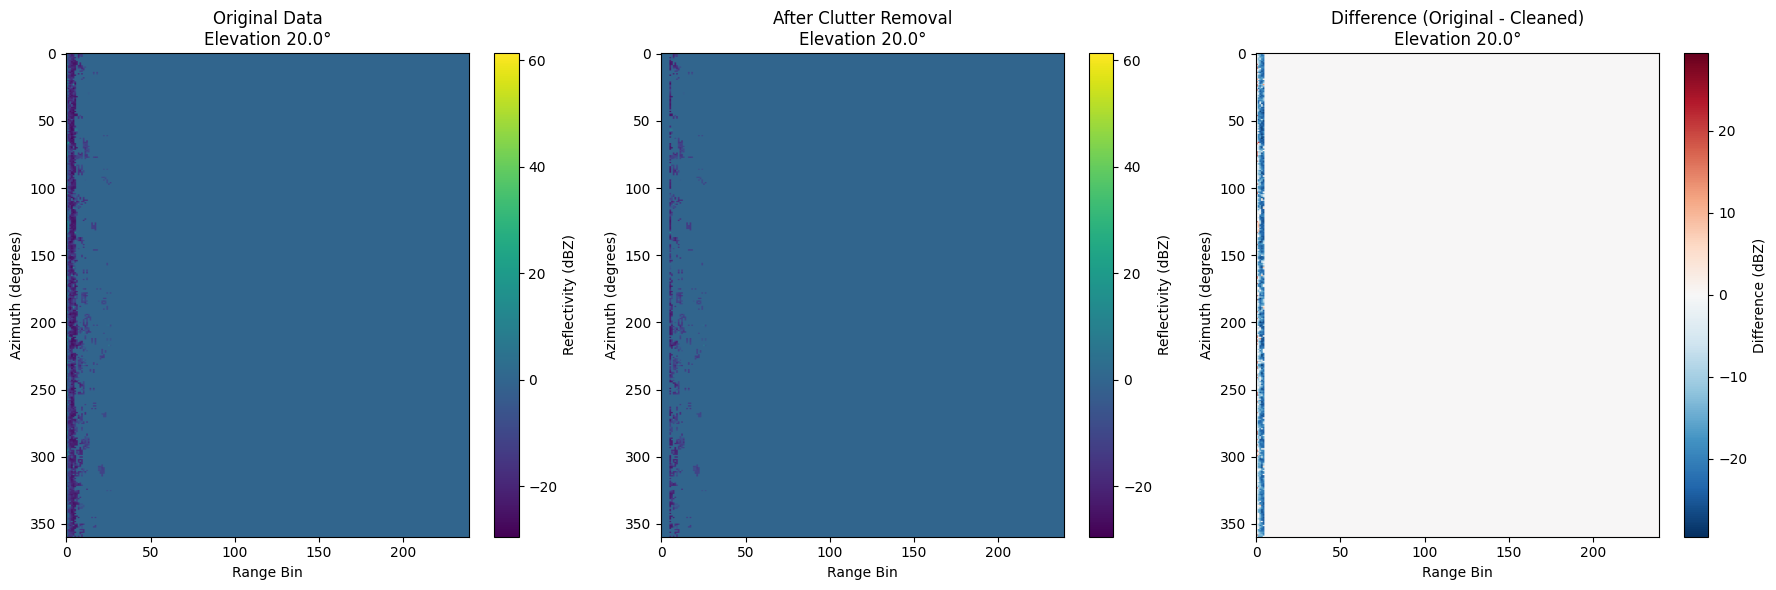

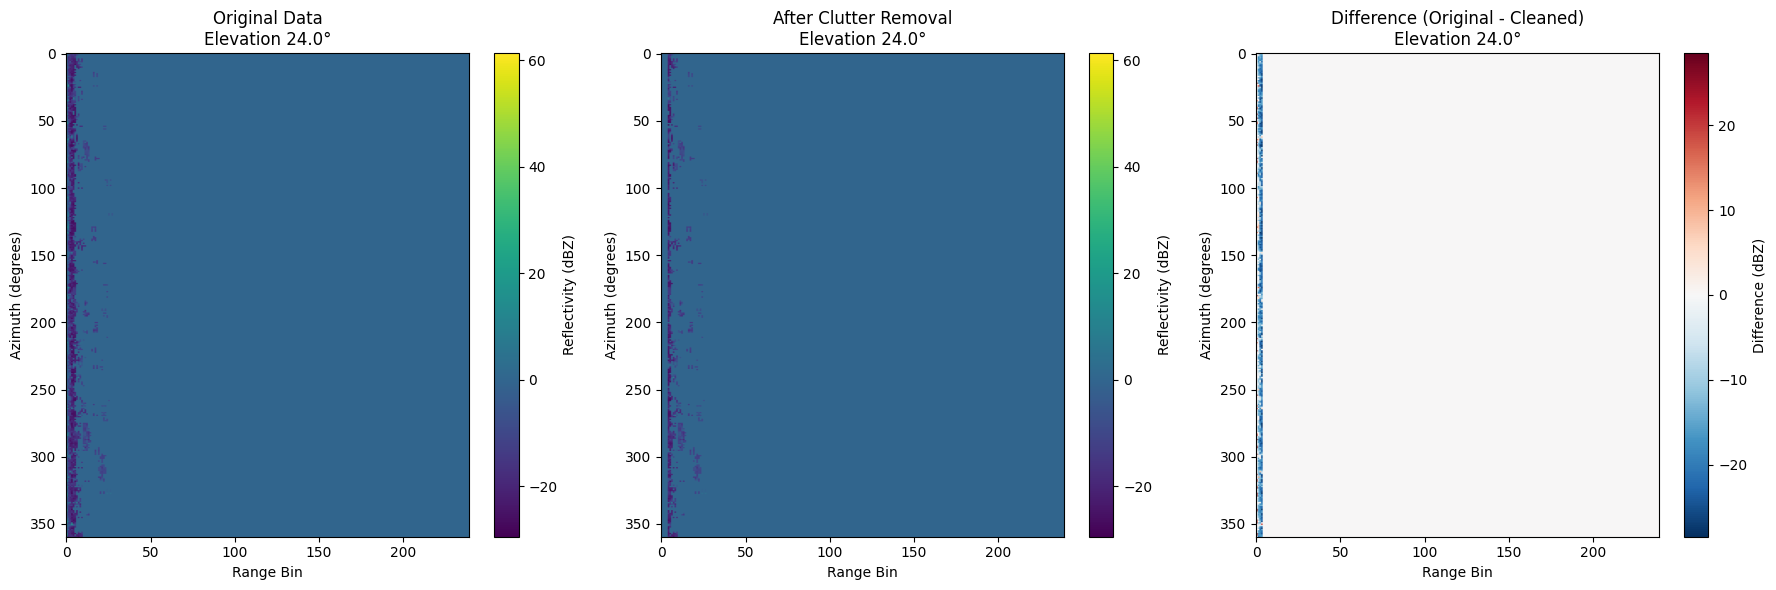

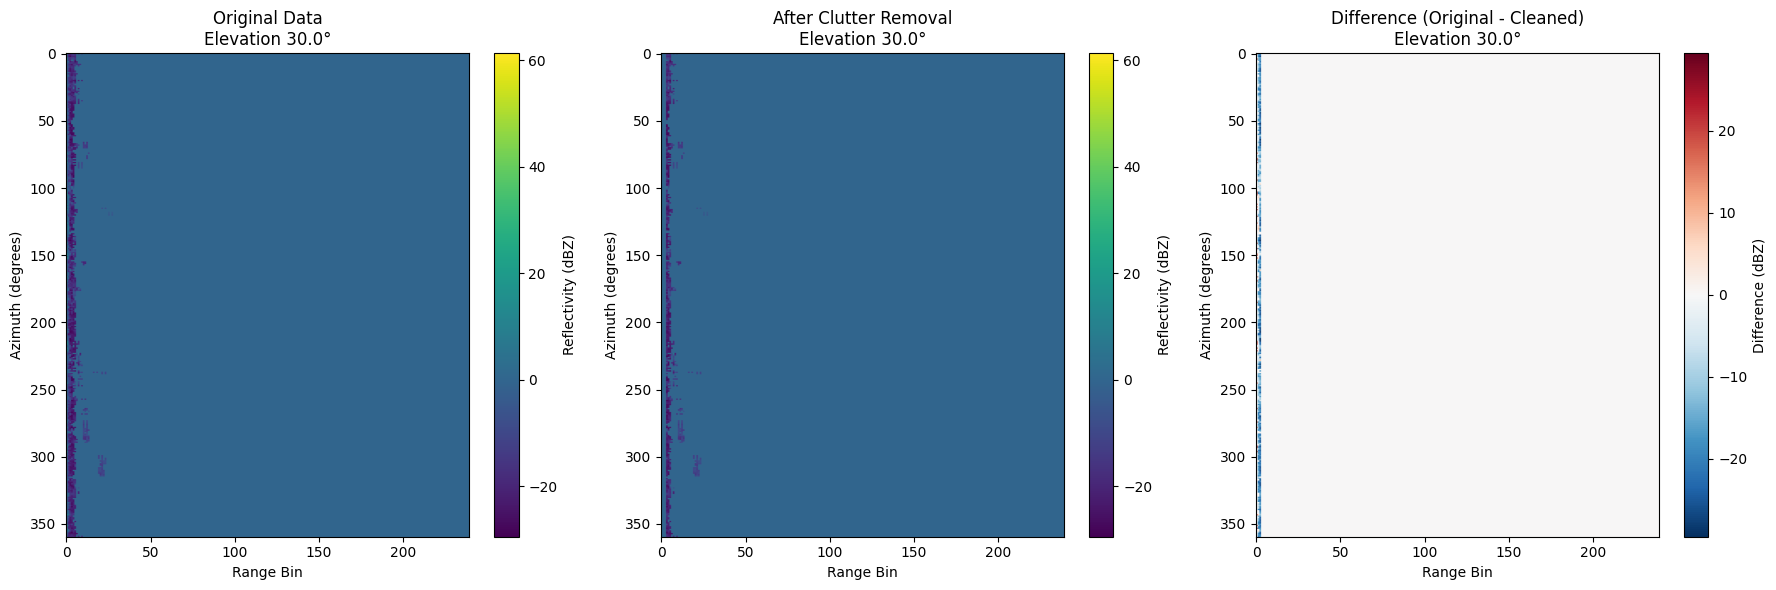

In [4]:
# KITradar elevations
elevations_deg = [0.4, 1.1, 2.0, 3.0, 4.5, 6.0, 7.5, 9.0, 11.0, 13.0, 16.0, 20.0, 24.0, 30.0]

def plot_radar_comparison_4d(original_data, cleaned_data, time_idx=0, elevation_idx=0, title_suffix="", 
                            data_min=None, data_max=None):
    """
    Plot comparison for 4D radar data at specific time and elevation.
    """
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    if data_min is None or data_max is None:
        data_min = min(original_data[time_idx, elevation_idx, :, :].min(), 
                       cleaned_data[time_idx, elevation_idx, :, :].min())
        data_max = max(original_data[time_idx, elevation_idx, :, :].max(), 
                       cleaned_data[time_idx, elevation_idx, :, :].max())
    
    # Original data
    im1 = ax1.imshow(original_data[time_idx, elevation_idx, :, :], aspect='auto', cmap='viridis', 
                     vmin=data_min, vmax=data_max)
    ax1.set_title(f'Original Data{title_suffix}\nElevation {elevations_deg[elevation_idx]:.1f}°')
    ax1.set_xlabel('Range Bin')
    ax1.set_ylabel('Azimuth (degrees)')
    plt.colorbar(im1, ax=ax1, label='Reflectivity (dBZ)')
    
    # Cleaned data
    im2 = ax2.imshow(cleaned_data[time_idx, elevation_idx, :, :], aspect='auto', cmap='viridis', 
                     vmin=data_min, vmax=data_max)
    ax2.set_title(f'After Clutter Removal{title_suffix}\nElevation {elevations_deg[elevation_idx]:.1f}°')
    ax2.set_xlabel('Range Bin')
    ax2.set_ylabel('Azimuth (degrees)')
    plt.colorbar(im2, ax=ax2, label='Reflectivity (dBZ)')
    
    # Difference
    difference = original_data[time_idx, elevation_idx, :, :] - cleaned_data[time_idx, elevation_idx, :, :]
    im3 = ax3.imshow(difference, aspect='auto', cmap='RdBu_r', 
                     vmin=-np.abs(difference).max(), vmax=np.abs(difference).max())
    ax3.set_title(f'Difference (Original - Cleaned){title_suffix}\nElevation {elevations_deg[elevation_idx]:.1f}°')
    ax3.set_xlabel('Range Bin')
    ax3.set_ylabel('Azimuth (degrees)')
    plt.colorbar(im3, ax=ax3, label='Difference (dBZ)')
    
    plt.tight_layout()
    plt.show()
    
global_data_min = min(original_data[0, :, :, :].min(), cleaned_data[0, :, :, :].min())
global_data_max = max(original_data[0, :, :, :].max(), cleaned_data[0, :, :, :].max())

for i in range(14):
    plot_radar_comparison_4d(original_data, cleaned_data, time_idx=0, elevation_idx=i, 
                            title_suffix="", data_min=global_data_min, data_max=global_data_max)

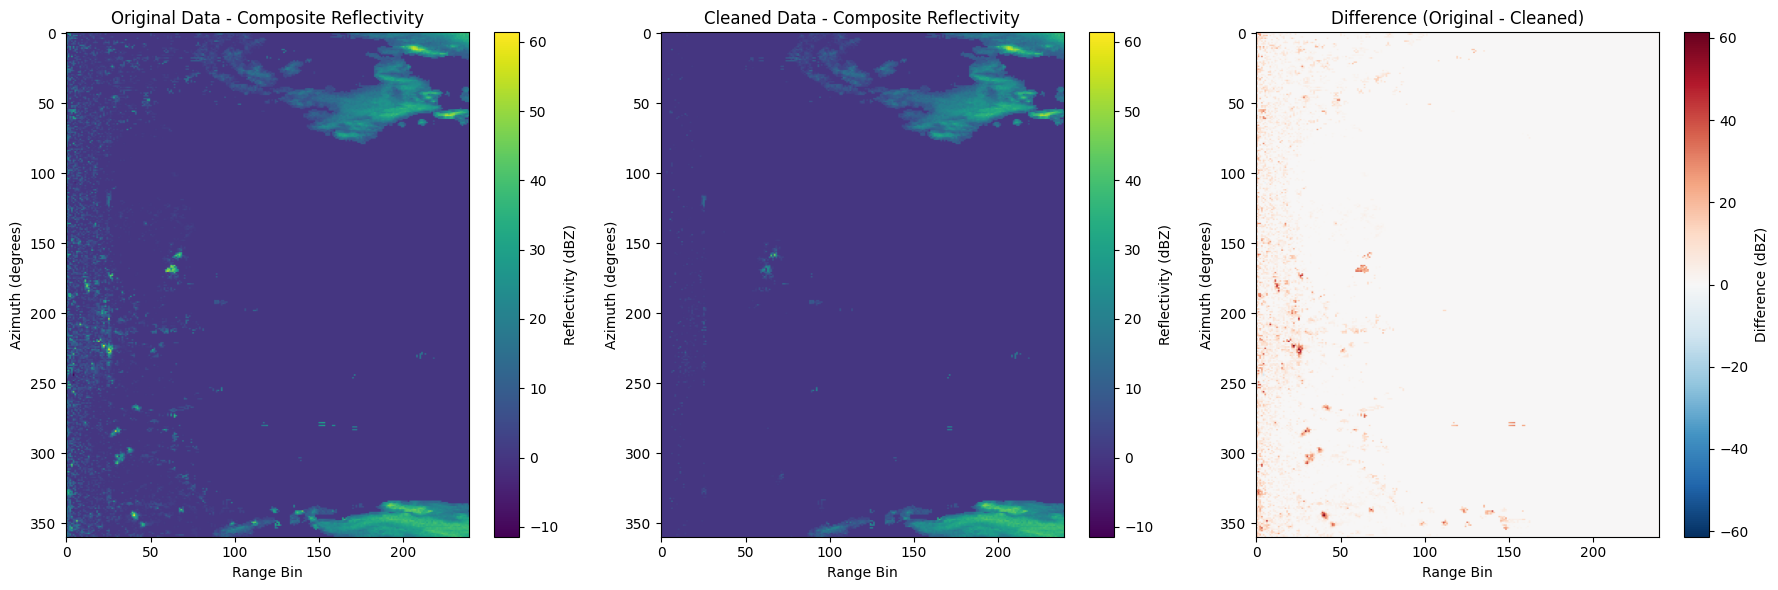

In [6]:
def plot_elevation_max_comparison(original_data, cleaned_data, time_idx=0):
    """
    Plot comparison of elevation-maximum data.
    """
    original_max = np.max(original_data[time_idx, :, :, :], axis=0)
    cleaned_max = np.max(cleaned_data[time_idx, :, :, :], axis=0)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    data_min = min(original_max.min(), cleaned_max.min())
    data_max = max(original_max.max(), cleaned_max.max())
    
    # Original data
    im1 = ax1.imshow(original_max, aspect='auto', cmap='viridis', vmin=data_min, vmax=data_max)
    ax1.set_title(f'Original Data - Composite Reflectivity')
    ax1.set_xlabel('Range Bin')
    ax1.set_ylabel('Azimuth (degrees)')
    plt.colorbar(im1, ax=ax1, label='Reflectivity (dBZ)')
    
    # Cleaned data
    im2 = ax2.imshow(cleaned_max, aspect='auto', cmap='viridis', vmin=data_min, vmax=data_max)
    ax2.set_title(f'Cleaned Data - Composite Reflectivity')
    ax2.set_xlabel('Range Bin')
    ax2.set_ylabel('Azimuth (degrees)')
    plt.colorbar(im2, ax=ax2, label='Reflectivity (dBZ)')
    
    # Difference
    difference = original_max - cleaned_max
    im3 = ax3.imshow(difference, aspect='auto', cmap='RdBu_r', 
                     vmin=-np.abs(difference).max(), vmax=np.abs(difference).max())
    ax3.set_title(f'Difference (Original - Cleaned)')
    ax3.set_xlabel('Range Bin')
    ax3.set_ylabel('Azimuth (degrees)')
    plt.colorbar(im3, ax=ax3, label='Difference (dBZ)')
    
    plt.tight_layout()
    plt.show()

plot_elevation_max_comparison(original_data, cleaned_data, time_idx=0)